<a href="https://colab.research.google.com/github/RooKeeh/AI-Google-Colab/blob/main/Lab_recapitulativ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Laborator recapitulativ Machine Learning**

Salvati acest notebook in drive, iar dupa rezolvare incarcati linkul de sharing in assignementul de pe moodle aferent laboratorului.

***Cerinte***


1.   Descarcati un set de date pentru clasificare de pe platforma [kaggle.com ](https://kaggle.com ). [Exemplu de cautare: https://www.kaggle.com/datasets?search=classification ]
2.   Puteti utiliza Numpy sau/si Pandas pentru a incarca setul de date.
3. Realizati vizualizari ale variabilelor din setul de date pentru a observa distributia (folositi matplotlib).
4. Impartiti setul de date in training (70%) si validare (30%).
4. Adaugati 3 algoritmi diferiti de clasificare pe care sa ii rulati pe setul de training si sa verificati performanta pe setul de validare. Utilizati ***accuracy*** ca si masura a performantei.
5. Afisati automat cea mai buna performanta si numele algoritmului castigator.

Utilizati template-ul de mai jos pentru a introduce codul aferent.






Import bibilioteci:

In [179]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tensorflow import keras

Incarcare date:

In [180]:
col_names = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'label']
df = pd.read_csv('glass.csv', header = None, skiprows = 1, names = col_names)

Vizualizari:

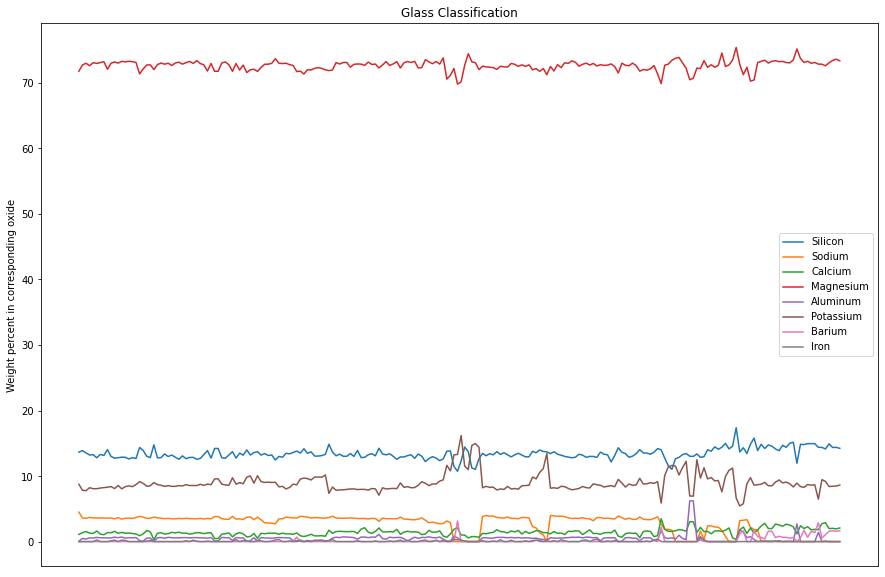

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,label
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [181]:
ri = df['RI']
na = df['Na']
mg = df['Mg']
al = df['Al']
si = df['Si']
k = df['K']
ca = df['Ca']
ba = df['Ba']
fe = df['Fe']
typeof = df['label']

plt.figure(figsize = (15, 10))

plt.plot(na)
plt.plot(mg)
plt.plot(al)
plt.plot(si)
plt.plot(k)
plt.plot(ca)
plt.plot(ba)
plt.plot(fe)

plt.title('Glass Classification')
plt.ylabel('Weight percent in corresponding oxide')
plt.legend(['Silicon', 'Sodium', 'Calcium', 'Magnesium', 'Aluminum', 'Potassium', 'Barium', 'Iron'])
plt.xticks([])

plt.show()

df.head()

Partitionare date:

In [182]:
y = df.label
x = df.drop(columns = 'label')
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

Algoritm 1 (Regresie logistica):

In [183]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracyrl = accuracy_score(y_test, y_pred)

Algoritm 2 (Arbori de decizie):

In [184]:
model = tree.DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracydt = accuracy_score(y_test, y_pred)

Algoritm 3 (Retele neuronale):

In [185]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(64, input_shape=(x_train.shape[1],), activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

y_pred = model.predict(x_test)

accuracynn = accuracy_score(y_test, y_pred)

Epoch 1/10
5/5 [==============================] - 1s 52ms/step - loss: -0.4854 - accuracy: 0.2349 - val_loss: -4.9195 - val_accuracy: 0.3846
Epoch 2/10
5/5 [==============================] - 0s 11ms/step - loss: -8.3733 - accuracy: 0.3020 - val_loss: -10.9052 - val_accuracy: 0.3846
Epoch 3/10
5/5 [==============================] - 0s 7ms/step - loss: -15.3542 - accuracy: 0.3020 - val_loss: -16.7150 - val_accuracy: 0.3846
Epoch 4/10
5/5 [==============================] - 0s 7ms/step - loss: -22.3054 - accuracy: 0.3020 - val_loss: -21.6317 - val_accuracy: 0.3846
Epoch 5/10
5/5 [==============================] - 0s 8ms/step - loss: -27.8269 - accuracy: 0.3020 - val_loss: -26.3282 - val_accuracy: 0.3846
Epoch 6/10
5/5 [==============================] - 0s 12ms/step - loss: -33.3109 - accuracy: 0.3020 - val_loss: -30.8394 - val_accuracy: 0.3846
Epoch 7/10
5/5 [==============================] - 0s 9ms/step - loss: -38.8681 - accuracy: 0.3020 - val_loss: -35.5755 - val_accuracy: 0.3846
Epoch 

3/3 [==============================] - 0s 5ms/step


Comparati performantele celor 3 algoritmi:

In [186]:
if accuracyrl > accuracydt and accuracyrl > accuracynn:
  print("The Logistic Regression model has the highest accuracy:", accuracyrl)
elif accuracydt > accuracyrl and accuracydt > accuracynn:
  print("The Decision Tree model has the highest accuracy:", accuracydt)
else:
  print("The Neural Network model has the highest accuracy:", accuracynn)

The Decision Tree model has the highest accuracy: 0.7384615384615385


---
***Nu uitati sa incarcati linkul in assignementul laboratorului pe moodle***